In [1]:
import pyrixs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd

# import PyQt6
# import PySide6
from PySide6 import QtCore, QtGui, QtWidgets, __version__
import shiboken6

from matplotlib.ticker import MultipleLocator
from matplotlib import rc, rcParams

In [2]:
major_tick_multiple = 5
minor_tick_multiple = 1
ylabel = 'Temperature (°C)'
xlabel = 'Binding Energy (eV)'
fontsize = 12
labelpad = 5

font_family='Arial'
axes_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5

rc('font',**{'family':'sans-serif','sans-serif':[font_family]})
rc('text', usetex=False)

In [3]:
dir = '../data/irixs/2024-3-28'
dir_list, info_file_list = pyrixs.Util.bulk_data_read(dir)
# print(dir_list)
idx = [i for i, s in enumerate(dir_list) if '16499' in str(s) or ('16500' in str(s))]
# idx = [i for i, s in enumerate(dir_list) if '16499' in s]
print(idx)

[6, 7]


In [4]:
rixs_list = []

for i in idx:
    dir = dir_list[i]
    info_file = info_file_list[i]
    rixs = pyrixs.Rixs(dir, info_file, calibration_data=None, skiprows=9)
    rixs_list.append(rixs)

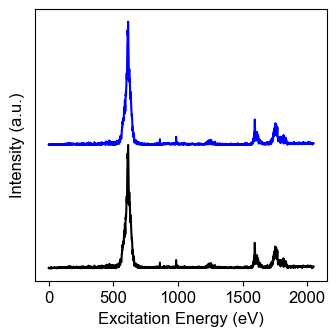

In [5]:
fig, ax = plt.subplots(layout='constrained')
xlim = None
ylim = None

color_list_nicole = [
    'black',
    'blue'
]

color_list = [
    "#D57800",
    "#672E45"
]

color_list = color_list_nicole

offset = [0, 1]

plot_opts_kwargs = {
    'xmajtm': 500,
    'xmintm': 1000
}

i = 0
for r in rixs_list:
    rixs.plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list[i], offset=offset[i],
                savefig=None, plot_opts_kwargs=plot_opts_kwargs,
                dim=[2.75,4])
    i += 1

In [6]:
x0 = [1744.5,1593.0]
dx = abs(x0[0]-x0[1])

In [7]:
de = abs(705 - 718.5)

In [8]:
m = de/dx
print(m)

0.0891089108910891


In [9]:
b = -1834.0

In [10]:
calibration_data = rixs_list[0].df.iloc[:,0]*m + b*m
print(calibration_data)

0      -163.425743
1      -163.336634
2      -163.247525
3      -163.158416
4      -163.069307
           ...    
2043     18.623762
2044     18.712871
2045     18.801980
2046     18.891089
2047     18.980198
Name: X, Length: 2048, dtype: float64


In [11]:
rixs_list_cal = []

for i in idx:
    dir = dir_list[i]
    info_file = info_file_list[i]
    rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data, skiprows=9)
    rixs_list_cal.append(rixs)

10644.726580350369
15324.252007893136


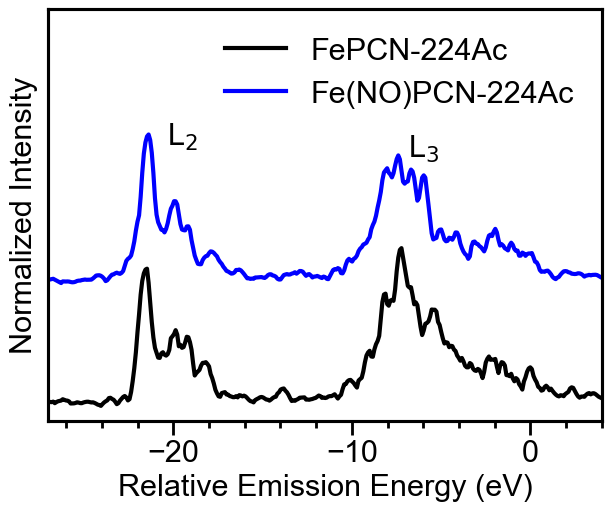

In [71]:
fig, ax = plt.subplots(layout='constrained')
xlim = [1500,1890]
xlim = [-27,4]
# xlim = [0,1900]
# ylim = [0,0.05]
ylim=[-0.01,0.475]

offset = [0.005, 0.15]
fontsize=22

plot_opts_kwargs = {
    'xmajtm': 10,
    'xmintm': 2,
    'xlabel': 'Relative Emission Energy (eV)',
    'ylabel': 'Normalized Intensity',
    'dim': [6,5],
    'fontsize': fontsize,
    'linewidth': 3,
    'axis_linewidth': 2.25
}

i = 0
for r in rixs_list_cal:
    r.plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list[i], offset=offset[i],
                savefig=None, plot_opts_kwargs=plot_opts_kwargs,
                filter=True, filter_args=[11,3], norm='area')
    i += 1
ax.legend(['FePCN-224Ac','Fe(NO)PCN-224Ac'], frameon=False, fontsize=fontsize, loc='upper right')
# %matplotlib qt
# fig.show()
ax.text(
    s='L$_2$',
    x=-19.5,
    y=0.325,
    fontsize=fontsize,
    ha='center',
    va='center'
)
ax.text(
    s='L$_3$',
    x=-19.5+de,
    y=0.31,
    fontsize=fontsize,
    ha='center',
    va='center'
)
plt.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L23-rough-cal.png')
plt.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L23-rough-cal.svg')

NameError: name 'calibration_data' is not defined

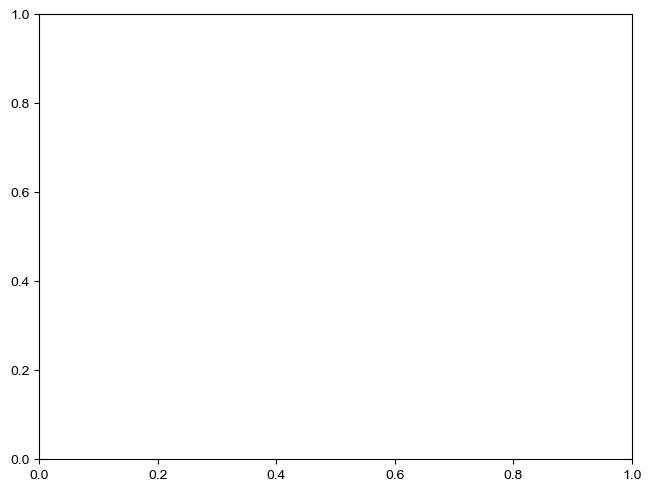

In [8]:
xlim_list = [
    [460,790],
    [495,555],
    [670,750]
]

ylim_list = [
    None,
    None,
    [-300,5000]
]

offset_list = [
    [0, 5000],
    [0, 1000],
    [0, 1200]
]

mintm_list = [25, 5, 5]
majtm_list = [100, 20, 20]

samples = ['FePCN-224Ac', 'Fe(NO)PCN-224Ac']
regions = ['survey','O-K','Fe-L3']

for j in range(len(xlim_list)):
    xlim = xlim_list[j]
    ylim = ylim_list[j]
    fig, ax = plt.subplots(layout='constrained')
    
    k = 0
    rixs_list = []
    for i in idx:
        dir = dir_list[i]
        info_file = info_file_list[i]
        rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data)
        rixs_list.append(rixs)
        rixs.plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list[k], offset=offset_list[j][k],
                      savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
                      dim=[2.75,4])
        k += 1
    fe_rixs_list.append(rixs_list)
    fig.savefig('../fig/XES-FePCN-224Ac-{}.svg'.format(regions[j]))

In [ ]:
697.5-752

-54.5

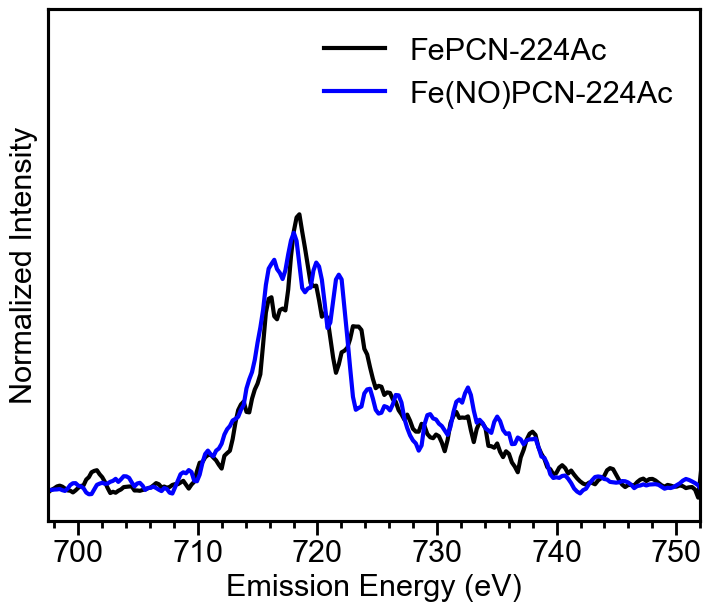

In [ ]:
fontsize=22
labelsize=22
linewidth=3

axis_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5
marker_edge_width=linewidth/2
labelpad=15

dim = [7,6]


j = 2
# xlim = xlim_list[j]
xlim = [697.5,752]
# xlim = [670,752]
ylim = [0,0.25]
ylim = [0.005,0.175]

offset = [0.01,0.125]
offset = [0.01, 0.05]
offset = [0.01, 0.01]

color_list_nicole = [
    'black',
    'blue'
]

fig, ax = plt.subplots(layout='constrained')
for k in [0,1]:
    fe_rixs_list[j][k].plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list_nicole[k], offset=offset[k],
        savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
        dim=[2.75,4], filter=True, filter_args=[11,3], norm='area',
        plot_opts_kwargs={
            'xlabel': 'Emission Energy (eV)',
            'ylabel': 'Normalized Intensity',
            'xmajtm': 10,
            'xmintm': 2,
            'dim': dim,
            'fontsize': fontsize,
            'axis_linewidth': axis_linewidth,
            'linewidth': linewidth
        }
    )
ax.legend(['FePCN-224Ac','Fe(NO)PCN-224Ac'], frameon=False, fontsize=fontsize)
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L3.svg')
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L3.png')

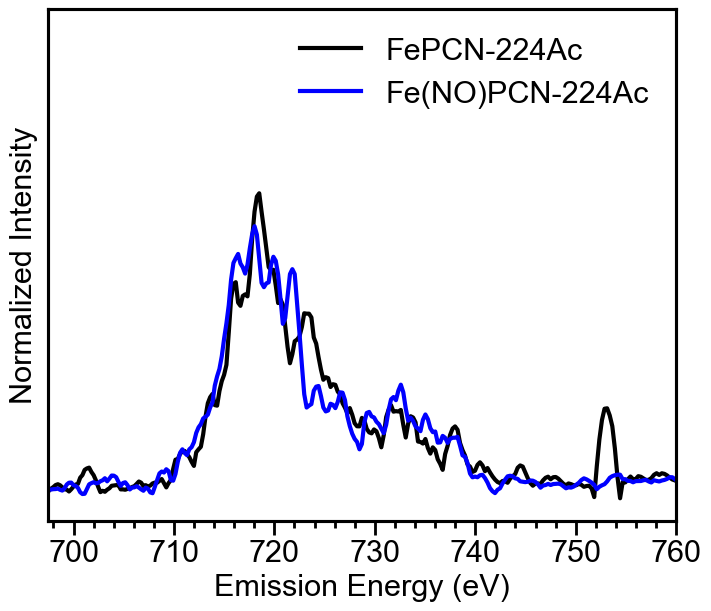

In [ ]:
fontsize=22
labelsize=22
linewidth=3

axis_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5
marker_edge_width=linewidth/2
labelpad=15

dim = [7,6]


j = 2
# xlim = xlim_list[j]
xlim = [697.5,760]
# xlim = [670,752]
ylim = [0,0.25]
ylim = [0.005,0.175]

offset = [0.01,0.125]
offset = [0.01, 0.05]
offset = [0.01, 0.01]

color_list_nicole = [
    'black',
    'blue'
]

fig, ax = plt.subplots(layout='constrained')
for k in [0,1]:
    fe_rixs_list[j][k].plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list_nicole[k], offset=offset[k],
        savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
        dim=[2.75,4], filter=True, filter_args=[11,3], norm='area',
        plot_opts_kwargs={
            'xlabel': 'Emission Energy (eV)',
            'ylabel': 'Normalized Intensity',
            'xmajtm': 10,
            'xmintm': 2,
            'dim': dim,
            'fontsize': fontsize,
            'axis_linewidth': axis_linewidth,
            'linewidth': linewidth
        }
    )
ax.legend(['FePCN-224Ac','Fe(NO)PCN-224Ac'], frameon=False, fontsize=fontsize)
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L3.svg')
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L3.png')

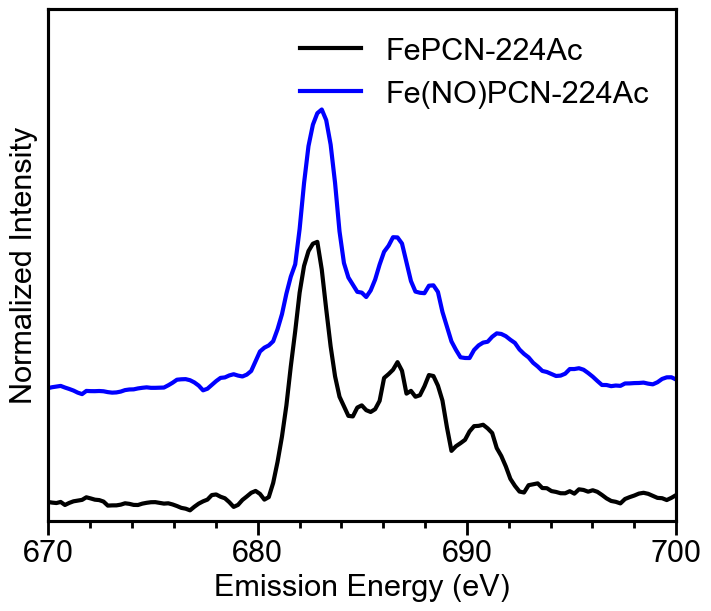

In [ ]:
fontsize=22
labelsize=22
linewidth=3

axis_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5
marker_edge_width=linewidth/2
labelpad=15

dim = [7,6]


j = 2
# xlim = xlim_list[j]
xlim = [670,700]
# xlim = [670,752]
ylim = [0,0.25]
ylim = [0.005,0.4]

offset = [0.01,0.125]
offset = [0.01, 0.1]

color_list_nicole = [
    'black',
    'blue'
]

fig, ax = plt.subplots(layout='constrained')
for k in [0,1]:
    fe_rixs_list[j][k].plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list_nicole[k], offset=offset[k],
        savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
        dim=[2.75,4], filter=True, filter_args=[11,3], norm='area',
        plot_opts_kwargs={
            'xlabel': 'Emission Energy (eV)',
            'ylabel': 'Normalized Intensity',
            'xmajtm': 10,
            'xmintm': 2,
            'dim': dim,
            'fontsize': fontsize,
            'axis_linewidth': axis_linewidth,
            'linewidth': linewidth
        }
    )
ax.legend(['FePCN-224Ac','Fe(NO)PCN-224Ac'], frameon=False, fontsize=fontsize)
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L23.svg')
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L23.png')

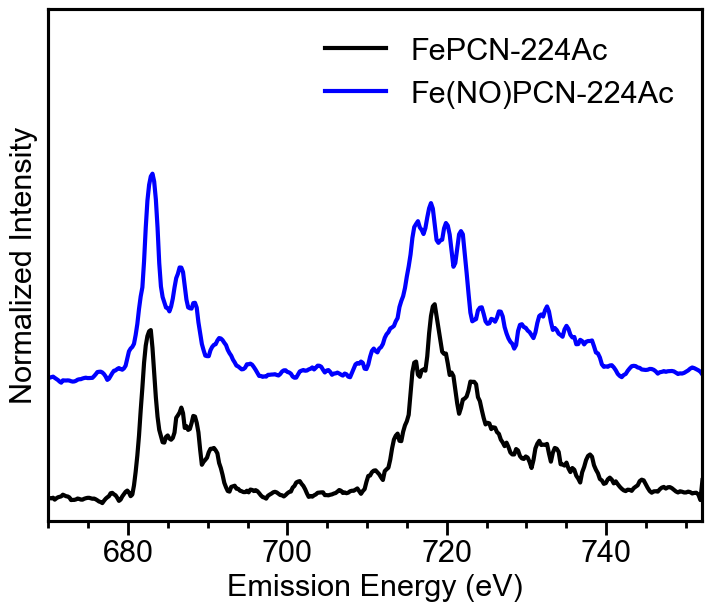

In [ ]:
fontsize=22
labelsize=22
linewidth=3

axis_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5
marker_edge_width=linewidth/2
labelpad=15

dim = [7,6]


j = 2
# xlim = xlim_list[j]
xlim = [670,752]
# xlim = [670,752]
ylim = [0,0.25]
ylim = [0.005,0.175]

offset = [0.01,0.125]
offset = [0.01, 0.05]

color_list_nicole = [
    'black',
    'blue'
]

fig, ax = plt.subplots(layout='constrained')
for k in [0,1]:
    fe_rixs_list[j][k].plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list_nicole[k], offset=offset[k],
        savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
        dim=[2.75,4], filter=True, filter_args=[11,3], norm='area',
        plot_opts_kwargs={
            'xlabel': 'Emission Energy (eV)',
            'ylabel': 'Normalized Intensity',
            'xmajtm': 20,
            'xmintm': 5,
            'dim': dim,
            'fontsize': fontsize,
            'axis_linewidth': axis_linewidth,
            'linewidth': linewidth
        }
    )
ax.legend(['FePCN-224Ac','Fe(NO)PCN-224Ac'], frameon=False, fontsize=fontsize)
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L23.svg')
fig.savefig('../fig/FePCN-224/XES-FePCN-244Ac-Fe-L23.png')

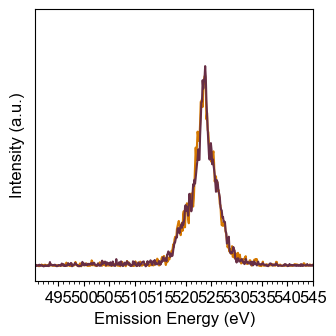

In [ ]:
j = 1
# xlim = xlim_list[j]
x0 = 545
xlim = [x0 - 54.5,x0]
ylim = [0,0.5]
ylim = [0.015,0.3]

offset = [0.03,0.25]
offset = [0.03,0.03]

fig, ax = plt.subplots(layout='constrained')
for k in [0,1]:
    fe_rixs_list[j][k].plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list[k], offset=offset[k],
                    savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
                    dim=[2.75,4], filter=False, filter_args=[5,3], norm='area')